In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline


In [93]:
import scipy
from scipy.stats import spearmanr
from pylab import rcParams

from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing

In [94]:
import os
os.getcwd()

'/Users/uohna/Dropbox/DataScienceProjects'

In [124]:
fhs_df = pd.read_csv('FraminghamRaw4000.csv')

In [125]:
fhs_df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [126]:
fhs_df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [127]:
fhs_df = fhs_df.rename(columns = {'male': 'gender'})

In [128]:
fhs_df.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [129]:
fhs_df['gender'] = fhs_df['gender'].replace({0:'Female', 1:'Male'}) #0 = Female; 1 = Male

In [101]:
fhs_df.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,Male,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [102]:
fhs_df_MLR = fhs_df[['gender','age', 'diabetes', 'currentSmoker', 'BMI',
                     'cigsPerDay', 'sysBP', 'totChol', 'glucose', 'TenYearCHD']]
fhs_df_MLR_male = fhs_df_MLR.loc[fhs_df_MLR['gender'] == 'Male'] #fhs_df_male = fhs_df.loc[fhs_df['gender'] == 'Male']
fhs_df_MLR_fem = fhs_df_MLR.loc[fhs_df_MLR['gender'] == 'Female'] #df.loc[df['A'] == 'foo']

In [103]:
fhs_df_MLR.head()

,gender,age,diabetes,currentSmoker,BMI,cigsPerDay,sysBP,totChol,glucose,TenYearCHD
0,Male,39,0,0,26.97,0.0,106.0,195.0,77.0,0
1,Female,46,0,0,28.73,0.0,121.0,250.0,76.0,0
2,Male,48,0,1,25.34,20.0,127.5,245.0,70.0,0
3,Female,61,0,1,28.58,30.0,150.0,225.0,103.0,1
4,Female,46,0,1,23.10,23.0,130.0,285.0,85.0,0


In [104]:
print(fhs_df_MLR.shape)
print(fhs_df_MLR_fem.shape)
print(fhs_df_MLR_male.shape)

(4240, 10)
(2420, 10)
(1820, 10)


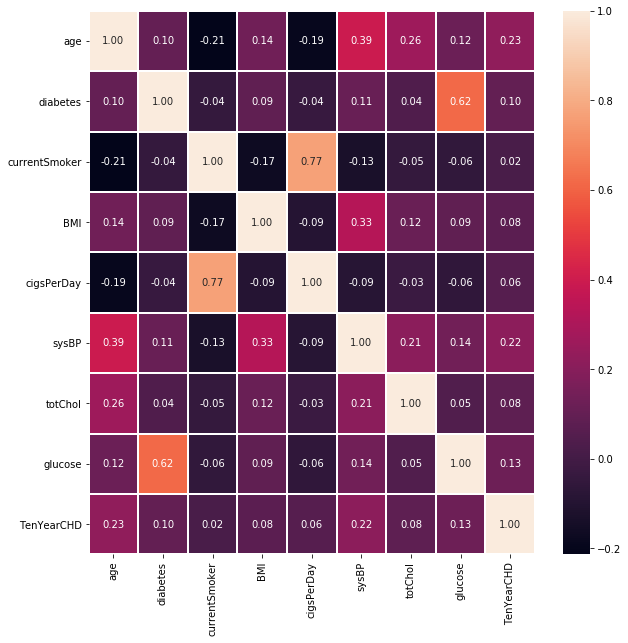

In [105]:
plt.figure(figsize=(10,10))
sns.heatmap(fhs_df_MLR.corr(), annot=True, linewidths=1, fmt=".2f")

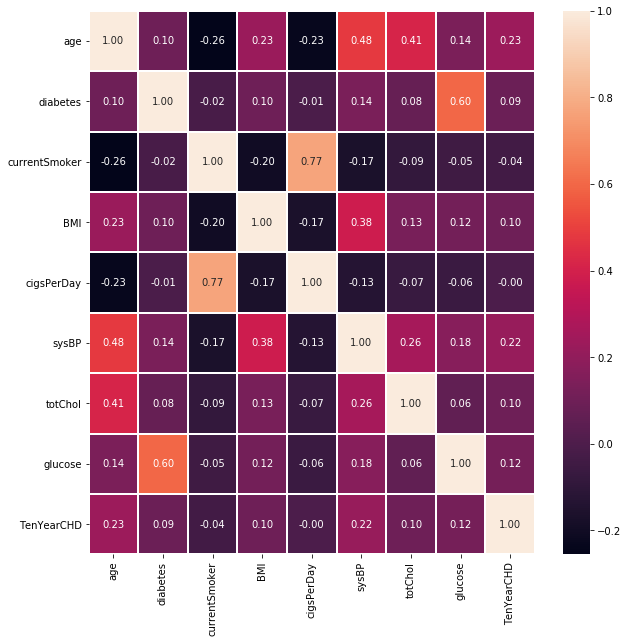

In [106]:
plt.figure(figsize=(10,10))
sns.heatmap(fhs_df_MLR_fem.corr(), annot=True, linewidths=1, fmt=".2f")

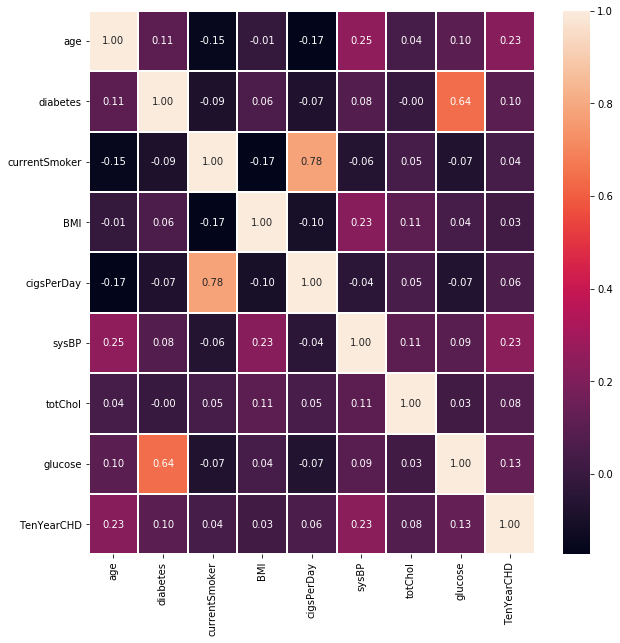

In [107]:
plt.figure(figsize=(10,10))
sns.heatmap(fhs_df_MLR_male.corr(), annot=True, linewidths=1, fmt=".2f")

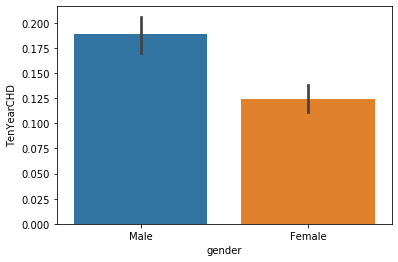

In [108]:
ax = sns.barplot(x="gender", y="TenYearCHD", data=fhs_df_MLR)
#ax = sns.barplot(x="day", y="total_bill", data=tips)

In [109]:
table1 = fhs_df_MLR.pivot_table(fhs_df_MLR, index=['gender'], 
                            aggfunc=[np.mean], fill_value=0)
#table = pd.pivot_table(df, values=['D', 'E'], index=['A', 'C'], aggfunc={'D': np.mean,'E': np.mean})

In [110]:
table1

mean                                                           \
              BMI TenYearCHD        age cigsPerDay currentSmoker  diabetes   
gender                                                                       
Female  25.510723   0.124380  49.795868   5.729730      0.408678  0.023554   
Male    26.185333   0.188462  49.293407  13.368771      0.607692  0.028571   

                                          
         glucose       sysBP     totChol  
gender                                    
Female  81.83605  133.040083  239.441313  
Male    82.12434  131.443132  233.104799

In [174]:
fhs_df = fhs_df.fillna(0)
fhs_df.groupby(['TenYearCHD', 'gender']).mean()

age  education  currentSmoker  cigsPerDay    BPMeds  \
TenYearCHD gender                                                              
0          Female  49.043417   1.947617       0.415290    5.699858  0.028787   
           Male    48.359513   1.961408       0.597156   12.878808  0.014895   
1          Female  55.093023   1.740864       0.362126    5.654485  0.093023   
           Male    53.314869   1.857143       0.653061   14.932945  0.037901   

                   prevalentStroke  prevalentHyp  diabetes     totChol  \
TenYearCHD gender                                                        
0          Female         0.004247      0.272770  0.018405  233.645588   
           Male           0.003385      0.280298  0.020311  230.774543   
1          Female         0.019934      0.558140  0.059801  246.036545   
           Male           0.014577      0.457726  0.064140  238.381924   

                        sysBP      diaBP        BMI  heartRate    glucose  
TenYearCHD gender                                                          
0          Female  131.090137  81.634025  25.275630  77.040113  71.577631  
           Male    129.257278  82.930264  26.083399  73.929587  75.274204  
1          Female  146.767442  86.961794  25.979203  77.504983  79.830565  
           Male    140.855685  86.998542  26.242566  75.451895  84.087464

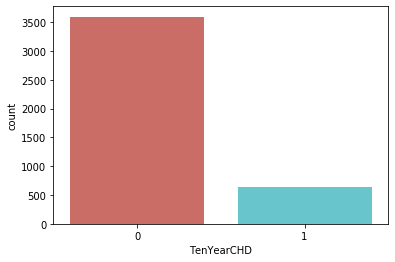

In [111]:
sns.countplot(x='TenYearCHD', data=fhs_df_MLR, palette='hls')

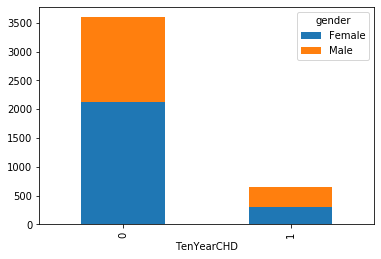

In [178]:
fhs_df.groupby(['TenYearCHD', 'gender']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [112]:
fhs_quant_df = fhs_df.select_dtypes(include=np.number)
fhs_quant_df.columns.tolist() 

['age',
 'education',
 'currentSmoker',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD']

In [113]:
#use only quant variables and drop any rows with missing values for explanatory variables
num_vars = fhs_df_MLR.fillna(0)

#split into explanatory and response variables
X = num_vars[['age', 'sysBP', 'currentSmoker', 'totChol', 'diabetes']]
Y = num_vars['TenYearCHD']

#split into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .30, random_state=42)

#Instantize LR model
mlr_model = LogisticRegression()

#Fit model
mlr_model.fit(X_test, Y_test)

#Score model's accuracy
print(mlr_model.score(X_test, Y_test))


0.8474842767295597


In [114]:
import statsmodels.api as sm
mlr_model=sm.Logit(Y_test, X_test)
result_gen=mlr_model.fit()
print(result_gen.summary2())

Optimization terminated successfully.
         Current function value: 0.441773
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.031   
Dependent Variable: TenYearCHD       AIC:              1133.8709
Date:               2020-04-16 11:29 BIC:              1159.6126
No. Observations:   1272             Log-Likelihood:   -561.94  
Df Model:           4                LL-Null:          -544.92  
Df Residuals:       1267             LLR p-value:      1.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     6.0000                                      
----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
----------------------------------------------------------------
age               -0.0051   0.0090 -0.5621 0.5741 -0.0227 0.0126
sysBP             -0.0067   0.0034 -1.9524 0.0509 -0.0134 0.0000
currentSmoker

In [115]:
#use only quant variables and drop any rows with missing values for explanatory variables
num_vars = fhs_df_MLR.fillna(0)

#split into explanatory and response variables
X_cigs = num_vars[['age', 'sysBP', 'cigsPerDay', 'totChol', 'diabetes']]
Y_cigs = num_vars['TenYearCHD']

#split into train and test
X_cigs_train, X_cigs_test, Y_cigs_train, Y_cigs_test = train_test_split(X_cigs, Y_cigs, test_size = .30, random_state=42)

#Instantize LR model
mlr_model = LogisticRegression()

#Fit model
mlr_model.fit(X_cigs_test, Y_cigs_test)

#Score model's accuracy
print(mlr_model.score(X_cigs_test, Y_cigs_test))


0.8498427672955975


In [116]:
mlr_mod_cigs=sm.Logit(Y_cigs_test, X_cigs_test)
result_cigs=mlr_mod_cigs.fit()
print(result_cigs.summary2())

Optimization terminated successfully.
         Current function value: 0.440979
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.029   
Dependent Variable: TenYearCHD       AIC:              1131.8516
Date:               2020-04-16 11:29 BIC:              1157.5933
No. Observations:   1272             Log-Likelihood:   -560.93  
Df Model:           4                LL-Null:          -544.92  
Df Residuals:       1267             LLR p-value:      1.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     6.0000                                      
-----------------------------------------------------------------
              Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-----------------------------------------------------------------
age          -0.0039    0.0090  -0.4267  0.6696  -0.0216   0.0139
sysBP        -0.0071    0.0034  -2.0748  0.0380  -0.0139  -0.0004
cigsPerD

In [117]:
#use only quant variables and drop any rows with missing values for explanatory variables
num_vars = fhs_df_MLR.fillna(0)

#split into explanatory and response variables
X_glu = num_vars[['age', 'sysBP', 'cigsPerDay', 'totChol', 'glucose']]
Y_glu = num_vars['TenYearCHD']

#split into train and test
X_glu_train, X_glu_test, Y_glu_train, Y_glu_test = train_test_split(X_glu, Y_glu, test_size = .30, random_state=42)

#Instantize LR model
mlr_model = LogisticRegression()

#Fit model
mlr_model.fit(X_glu_test, Y_glu_test)

#Score model's accuracy
print(mlr_model.score(X_glu_test, Y_glu_test))

0.8498427672955975


In [118]:
mlr_mod_glu=sm.Logit(Y_glu_test, X_glu_test)
result_glu=mlr_mod_glu.fit()
print(result_glu.summary2())

Optimization terminated successfully.
         Current function value: 0.449766
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.050   
Dependent Variable: TenYearCHD       AIC:              1154.2048
Date:               2020-04-16 11:29 BIC:              1179.9465
No. Observations:   1272             Log-Likelihood:   -572.10  
Df Model:           4                LL-Null:          -544.92  
Df Residuals:       1267             LLR p-value:      1.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     5.0000                                      
-----------------------------------------------------------------
              Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-----------------------------------------------------------------
age          -0.0034    0.0090  -0.3728  0.7093  -0.0211   0.0143
sysBP        -0.0077    0.0035  -2.2030  0.0276  -0.0145  -0.0008
cigsPerD

In [119]:
#Females
num_vars_fem = fhs_df[fhs_df['gender'] == 'Female']
num_vars_fem = num_vars_fem.fillna(0)

#split into explanatory and response variables
X_fem = num_vars_fem[['age', 'sysBP', 'cigsPerDay', 'totChol', 'glucose']]
Y_fem = num_vars_fem['TenYearCHD']

#split into train and test
X_fem_train, X_fem_test, Y_fem_train, Y_fem_test = train_test_split(X_fem, Y_fem, test_size = .30, random_state=42)

#Instantize LR model
mlr_model = LogisticRegression()

#Fit model
mlr_model.fit(X_fem_test, Y_fem_test)

#Score model's accuracy
print(mlr_model.score(X_fem_test, Y_fem_test))

0.8980716253443526


In [120]:
mlr_mod_fem=sm.Logit(Y_fem_test, X_fem_test)
result_fem=mlr_mod_glu.fit()
print(result_fem.summary2())

Optimization terminated successfully.
         Current function value: 0.449766
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.050   
Dependent Variable: TenYearCHD       AIC:              1154.2048
Date:               2020-04-16 11:29 BIC:              1179.9465
No. Observations:   1272             Log-Likelihood:   -572.10  
Df Model:           4                LL-Null:          -544.92  
Df Residuals:       1267             LLR p-value:      1.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     5.0000                                      
-----------------------------------------------------------------
              Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-----------------------------------------------------------------
age          -0.0034    0.0090  -0.3728  0.7093  -0.0211   0.0143
sysBP        -0.0077    0.0035  -2.2030  0.0276  -0.0145  -0.0008
cigsPerD

In [121]:
#Males
num_vars_male = fhs_df[fhs_df['gender'] == 'Male']
num_vars_male = num_vars_fem.fillna(0)

#split into explanatory and response variables
X_male = num_vars_male[['age', 'sysBP', 'cigsPerDay', 'totChol', 'glucose']]
Y_male = num_vars_male['TenYearCHD']

#split into train and test
X_male_train, X_male_test, Y_male_train, Y_male_test = train_test_split(X_male, Y_male, test_size = .30, random_state=42)

#Instantize LR model
mlr_model = LogisticRegression()

#Fit model
mlr_model.fit(X_male_test, Y_male_test)

#Score model's accuracy
print(mlr_model.score(X_male_test, Y_male_test))

0.8980716253443526


In [122]:
import statsmodels.api as sm
logit_model_male=sm.Logit(Y_male_test, X_male_test)
result_male=logit_model_male.fit()
print(result_male.summary2())

Optimization terminated successfully.
         Current function value: 0.350161
         Iterations 6
                        Results: Logit
Model:              Logit            Pseudo R-squared: -0.044  
Dependent Variable: TenYearCHD       AIC:              518.4342
Date:               2020-04-16 11:30 BIC:              541.3719
No. Observations:   726              Log-Likelihood:   -254.22 
Df Model:           4                LL-Null:          -243.39 
Df Residuals:       721              LLR p-value:      1.0000  
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     6.0000                                     
----------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
----------------------------------------------------------------
age          0.0181    0.0143   1.2662  0.2054  -0.0099   0.0460
sysBP       -0.0075    0.0053  -1.4202  0.1556  -0.0179   0.0029
cigsPerDay  -0.0192   

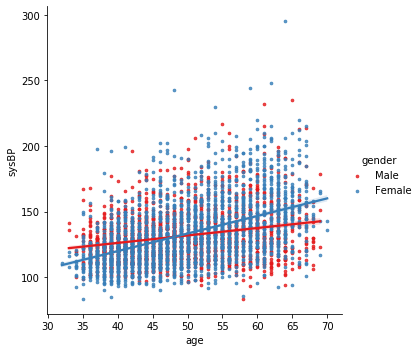

In [166]:

sns.lmplot( x="age", y="sysBP", data=fhs_df, fit_reg=True, hue='gender', legend=True, palette="Set1", scatter_kws={"s": 7})

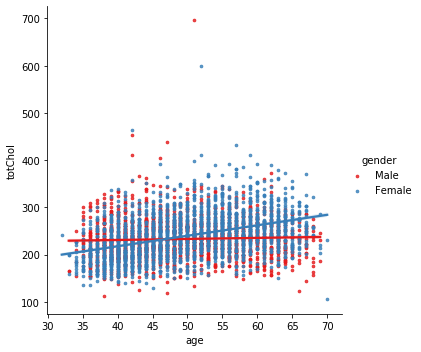

In [165]:
sns.lmplot( x="age", y="totChol", data=fhs_df, fit_reg=True, hue='gender', legend=True, palette="Set1", scatter_kws={"s": 7})

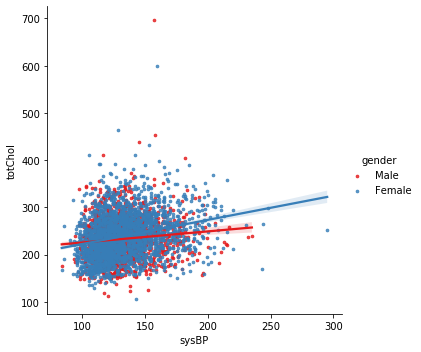

In [161]:
sns.lmplot( x="sysBP", y="totChol", data=fhs_df, fit_reg=True, hue='gender', legend=True, palette="Set1", scatter_kws={"s": 7})

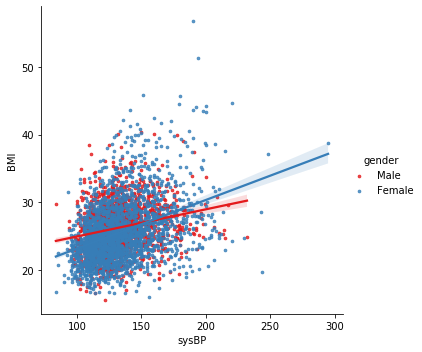

In [162]:
sns.lmplot( x="sysBP", y="BMI", data=fhs_df, fit_reg=True, hue='gender', legend=True, palette="Set1", scatter_kws={"s": 7})

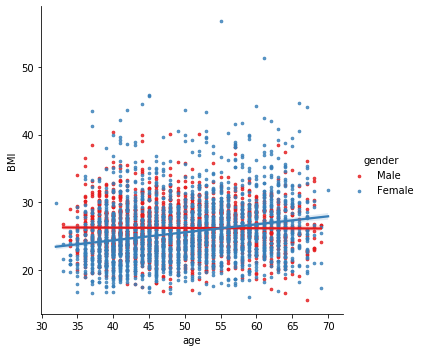

In [164]:
sns.lmplot( x="age", y="BMI", data=fhs_df, fit_reg=True, hue='gender', legend=True, palette="Set1", scatter_kws={"s": 7})